# Metehan Ayhan - Image Classification CIFAR_10 Project

Bu proje, CIFAR-10 veri setini kullanarak görüntü sınıflandırma problemini çözmeyi amaçlamaktadır. CIFAR-10 veri seti, 32x32 piksel boyutunda renkli görüntüler içeren ve 10 farklı kategoriye ayrılmış toplam 60,000 görüntüden oluşmaktadır. Bu proje kapsamında, TensorFlow ve Keras kütüphanelerini kullanarak bir Konvolüsyonel Sinir Ağı (CNN) modeli geliştirilecektir. Model, eğitim verileri kullanılarak eğitilecek ve test verileri üzerinde doğruluğu değerlendirilecektir. Amaç, modelin çeşitli nesne kategorilerini yüksek doğrulukla sınıflandırabilmesini sağlamak ve böylece derin öğrenme tekniklerinin görüntü sınıflandırma üzerindeki etkinliğini değerlendirmektir.

### Import Packet

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

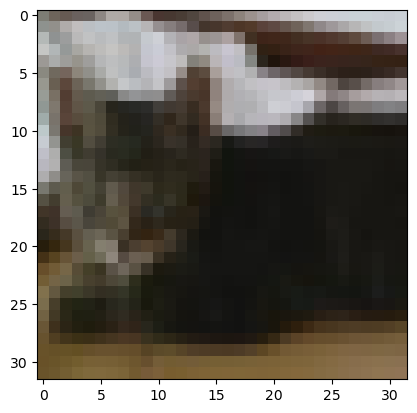

In [9]:
plt.imshow(x_train[9])

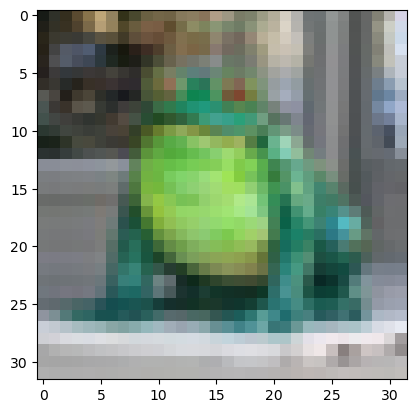

In [10]:
plt.imshow(x_train[19])

### Normalize

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

### Model

In [38]:
model = Sequential([
    InputLayer(input_shape=(32, 32, 3)),  # CIFAR-10 için RGB görüntü
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(10, activation='softmax')  # Sınıflandırma için softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(x_train,y_train,validation_split=.2,epochs=25)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.3678 - loss: 2.0258 - val_accuracy: 0.4839 - val_loss: 1.5711
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.5643 - loss: 1.2425 - val_accuracy: 0.5928 - val_loss: 1.1400
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6296 - loss: 1.0580 - val_accuracy: 0.5347 - val_loss: 1.3782
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.6701 - loss: 0.9279 - val_accuracy: 0.5921 - val_loss: 1.1454
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7102 - loss: 0.8297 - val_accuracy: 0.6093 - val_loss: 1.1905
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7304 - loss: 0.7715 - val_accuracy: 0.7019 - val_loss: 0.8805
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.7547 - loss: 0.6953 - val_accuracy: 0.6737 - val_loss: 0.9761
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.7817 -

### Result

In [16]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7355 - loss: 1.2501


In [17]:
accuracy

0.7283999919891357

In [42]:
model.save("mymodel.keras")

In [33]:
prediction = model.predict(np.expand_dims(x_train[9], axis=0)) 
predicted_class = np.argmax(prediction)
class_labels[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'cat'

In [31]:
prediction = model.predict(np.expand_dims(x_train[19], axis=0)) 
predicted_class = np.argmax(prediction) 

# CIFAR-10 sınıf etiketleri
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_labels[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


'frog'

Bu proje kapsamında, CIFAR-10 veri seti kullanılarak bir görüntü sınıflandırma problemi çözülmeye çalışılmıştır. Proje boyunca Konvolüsyonel Sinir Ağları (CNN) kullanılarak modelin doğruluğunu artırmaya yönelik çeşitli stratejiler uygulanmıştır. Modelin doğruluğu %72 civarında olsa da, ileri optimizasyon teknikleri, farklı mimariler ve hiperparametre ayarlamaları ile bu doğruluğun daha da artırılması mümkündür. Sonuç olarak, proje derin öğrenmenin görüntü sınıflandırma üzerindeki etkisini göstermiş ve gelecekte yapılacak iyileştirmeler için sağlam bir temel oluşturmuştur.